<a href="https://colab.research.google.com/github/Pratiksha5050/Animal-Classification/blob/main/micro(Animal_Classification)_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Importing the required packages
import numpy as np
import pandas as pd
import os
import math
from subprocess import check_output
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import accuracy_score
from scipy.stats import norm,skew
from sklearn import metrics


df = pd.read_csv('/content/drive/MyDrive/zoo.csv')

df_class = pd.read_csv('/content/drive/MyDrive/class.csv')
df = pd.DataFrame(df)

print(df.head())
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())
#Model Building¶
X = df.iloc[:, 1:17]
y = df.iloc[:, 17]

#spliting of dataset in test & train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

None

(75, 16)
(75,)
(26, 16)
(26,)


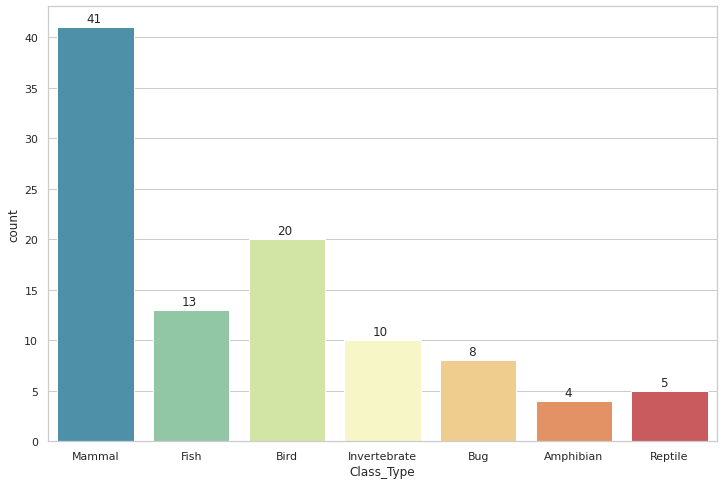

In [61]:
# see which class the most zoo animals belong to
class_types = list(df_class['Class_Type'])
data = pd.merge(df, df_class, how='left', left_on='class_type', right_on='Class_Number')


plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

**Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression


#Testing the results for different C values.(regularization strength C )
logreg = LogisticRegression(C=100).fit(X_train, y_train) #.fit() takes x, y, and possibly observation-related weights.

log=logreg.score(X_test, y_test)
print("accuracy:" +str(log.mean()))

accuracy:1.0


**SVM**

In [72]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train,y_train)
score_svc = svc.score(X_test, y_test)
print("accuracy:" +str(score_svc.mean()))

accuracy:1.0


**Random Forest Regression**

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
RandomForestClassifierScore = rf.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",str(RandomForestClassifierScore.mean()))

Accuracy obtained by Random Forest Classifier model: 1.0


**KNN**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",str(KNeighborsClassifierScore.mean()))

Accuracy obtained by K Neighbors Classifier model: 1.0


**Naive Bayes**

In [76]:

# Building Phase
# training the model on training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# making predictions on the testing set
nb=gnb.score(X_test,y_test)

# Performancec Evaluation
#print("Results Using Gaussian Naive Bayes Classifier\n\n")
print ("Accuracy : ", str(nb.mean()))


Accuracy :  1.0


In [78]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression','Random Forest','KNN','Naive Bayes'],
    'Score': [score_svc.mean(), log.mean(), RandomForestClassifierScore.mean(), KNeighborsClassifierScore.mean(),nb.mean()]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,1.0
1,Logistic Regression,1.0
2,Random Forest,1.0
3,KNN,1.0
4,Naive Bayes,1.0


Text(0.5, 1.0, 'Model')

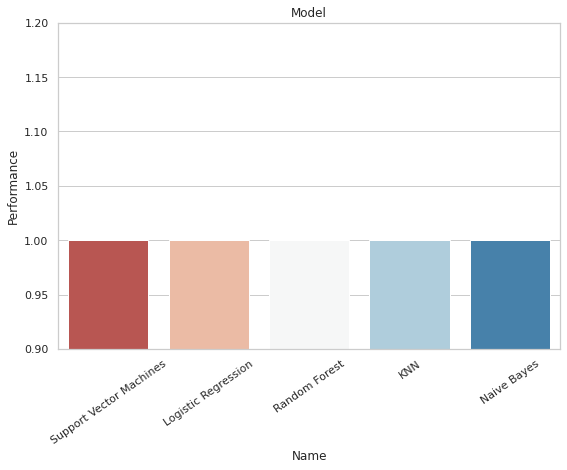

In [81]:
# Performance of models

Model= ['Support Vector Machines','Logistic Regression','Random Forest','KNN','Naive Bayes']
Score= [score_svc.mean(), log.mean(), RandomForestClassifierScore.mean(), KNeighborsClassifierScore.mean(),nb.mean()]
fg,ax = plt.subplots(nrows=1,ncols=1,figsize=(9, 6))
sns.barplot(Model, Score,palette="RdBu")
plt.ylim(0.90, 1.2)
ax.set_ylabel("Performance")
ax.set_xlabel("Name")
ax.set_xticklabels(Model,rotation=35)
plt.title('Model')